In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [46]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


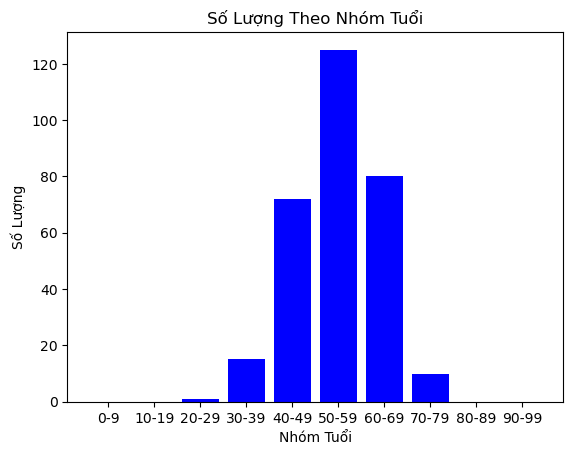

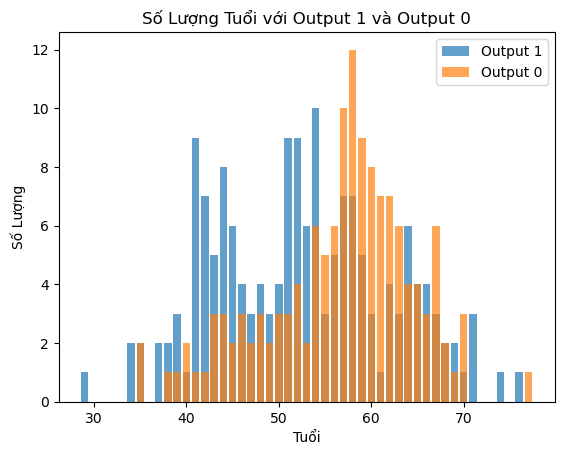

In [22]:
# Tuổi
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn và 'age' là cột chứa dữ liệu về tuổi
# Nếu bạn đã có age_count từ trước, bỏ qua bước này
age_count = df['age'].value_counts()

# Chia khoảng 10 tuổi và đếm số lượng
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group_count = df['age_group'].value_counts()

# Sắp xếp theo tuổi tăng dần
age_group_count = age_group_count.sort_index()

# Vẽ biểu đồ cột
plt.bar(age_group_count.index, age_group_count.values, color='blue')
plt.xlabel('Nhóm Tuổi')
plt.ylabel('Số Lượng')
plt.title('Số Lượng Theo Nhóm Tuổi')
plt.show()
# =======================================
output_count = df['output'].value_counts()

# Thống kê số lượng tuổi với output là 1
output_1_age_count = df[df['output'] == 1]['age'].value_counts().sort_index()

# Thống kê số lượng tuổi với output là 0
output_0_age_count = df[df['output'] == 0]['age'].value_counts().sort_index()

# Vẽ biểu đồ
plt.bar(output_1_age_count.index, output_1_age_count.values, label='Output 1', alpha=0.7)
plt.bar(output_0_age_count.index, output_0_age_count.values, label='Output 0', alpha=0.7)
plt.xlabel('Tuổi')
plt.ylabel('Số Lượng')
plt.title('Số Lượng Tuổi với Output 1 và Output 0')
plt.legend()
plt.show()

In [36]:
output_count=df['output'].value_counts()
output_count

1    165
0    138
Name: output, dtype: int64

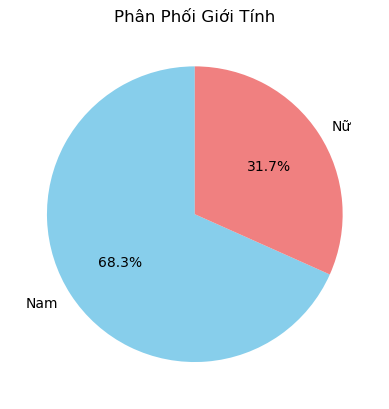

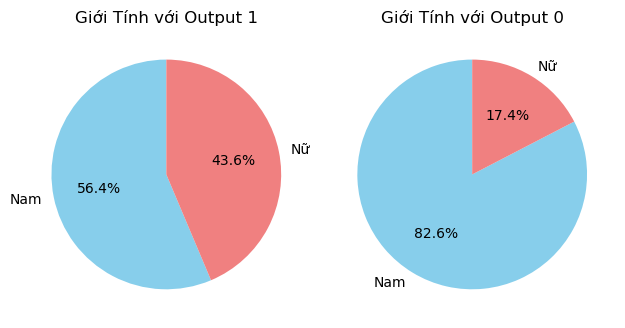

In [26]:
# Giới tính
import pandas as pd
import matplotlib.pyplot as plt

sex_count = df['sex'].value_counts()

# Chú thích giới tính
sex_labels = ['Nam', 'Nữ']

# Vẽ biểu đồ tròn
plt.pie(sex_count, labels=sex_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Phân Phối Giới Tính')
plt.show()
# ================================================

# Tách dữ liệu thành hai nhóm: output là 1 và output là 0
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng giới tính cho mỗi nhóm
sex_count_output_1 = df_output_1['sex'].value_counts()
sex_count_output_0 = df_output_0['sex'].value_counts()

# Chú thích giới tính
sex_labels = ['Nam', 'Nữ']

# Vẽ biểu đồ tròn cho output là 1
plt.subplot(1, 2, 1)
plt.pie(sex_count_output_1, labels=sex_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Giới Tính với Output 1')

# Vẽ biểu đồ tròn cho output là 0
plt.subplot(1, 2, 2)
plt.pie(sex_count_output_0, labels=sex_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Giới Tính với Output 0')

plt.tight_layout()
plt.show()

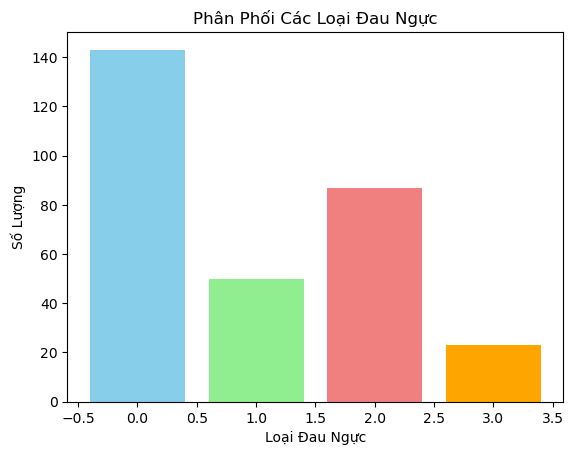

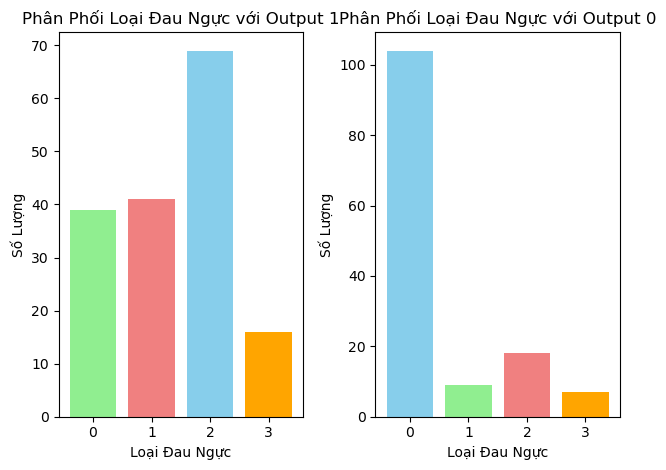

In [50]:
# Các loại đau ngực
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn và 'cp' là cột chứa dữ liệu về loại đau ngực
# Nếu bạn đã có cp_count từ trước, bỏ qua bước này
cp_count = df['cp'].value_counts()
cp_count

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

# Vẽ biểu đồ cột với màu sắc khác nhau
plt.bar(cp_count.index, cp_count.values, color=colors)
plt.xlabel('Loại Đau Ngực')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Các Loại Đau Ngực')

# Thêm chú thích

plt.show()

# ==================================================
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng loại đau ngực cho mỗi nhóm
cp_count_output_1 = df_output_1['cp'].value_counts()
cp_count_output_0 = df_output_0['cp'].value_counts()


# Màu sắc tương ứng với từng giá trị
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

# Vẽ biểu đồ cột với màu sắc khác nhau cho output là 1
plt.subplot(1, 2, 1)
plt.bar(cp_count_output_1.index, cp_count_output_1.values, color=colors)
plt.xlabel('Loại Đau Ngực')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Loại Đau Ngực với Output 1')

# Vẽ biểu đồ cột với màu sắc khác nhau cho output là 0
plt.subplot(1, 2, 2)
plt.bar(cp_count_output_0.index, cp_count_output_0.values, color=colors)
plt.xlabel('Loại Đau Ngực')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Loại Đau Ngực với Output 0')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distribution(df, feature, bins, labels, output_column):
    df_output_1 = df[df[output_column] == 1]
    df_output_0 = df[df[output_column] == 0]

    # Tính số lượng cho mỗi nhóm
    count_1 = df_output_1[feature].value_counts().sort_index()
    count_0 = df_output_0[feature].value_counts().sort_index()

    # Loại bỏ giá trị không cần thiết (nếu có)
    if 'remove_value' in locals():
        count_1 = count_1.loc[count_1.index != remove_value]
        count_0 = count_0.loc[count_0.index != remove_value]

    # Vẽ biểu đồ cột cho feature với output là 1
    plt.subplot(1, 2, 1)
    plt.bar(count_1.index, count_1.values, color='skyblue')
    plt.xlabel(f'Nhóm {feature}')
    plt.ylabel('Số Lượng')
    plt.title(f'Phân Phối {feature} với {output_column} 1')

    # Vẽ biểu đồ cột cho feature với output là 0
    plt.subplot(1, 2, 2)
    plt.bar(count_0.index, count_0.values, color='lightcoral')
    plt.xlabel(f'Nhóm {feature}')
    plt.ylabel('Số Lượng')
    plt.title(f'Phân Phối {feature} với {output_column} 0')

    plt.tight_layout()
    plt.show()


Chỉ số đường trong máu (fbs)

90-100      2
101-110    18
111-120    40
121-130    75
131-140    71
141-150    46
151-160    25
161-170    13
171-180     8
181-190     3
191-200     1
201-210     1
211-220     0
221-230     0
231-240     0
241-250     0
Name: trtbps_group, dtype: int64


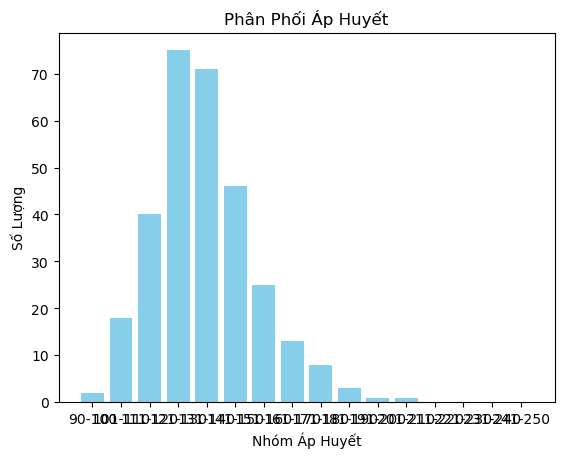

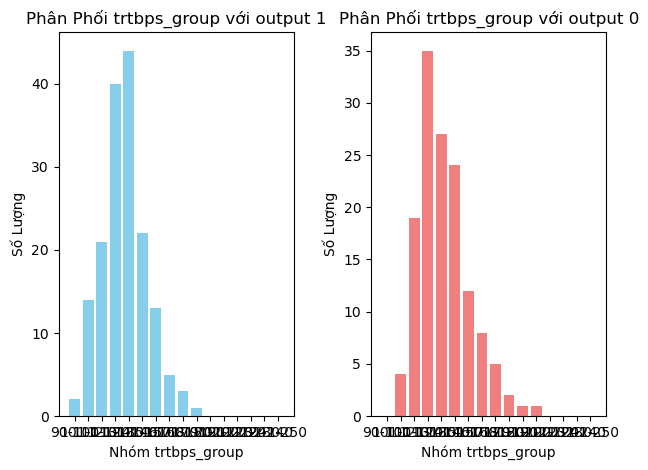

In [73]:
#fbs
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn và 'trtbps' là cột chứa dữ liệu về áp huyết
# Nếu bạn đã có trtbps_count từ trước, bỏ qua bước này
trtbps_count = df['trtbps'].value_counts()

# Chia khoảng áp huyết và đếm số lượng
bins = [90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
labels = ['90-100', '101-110', '111-120', '121-130', '131-140', '141-150', '151-160', '161-170', '171-180', '181-190', '191-200', '201-210', '211-220', '221-230', '231-240', '241-250']
df['trtbps_group'] = pd.cut(df['trtbps'], bins=bins, labels=labels, right=False)
trtbps_group_count = df['trtbps_group'].value_counts().sort_index()

# Hiển thị kết quả
print(trtbps_group_count)
plt.bar(trtbps_group_count.index, trtbps_group_count.values, color='skyblue')
plt.xlabel('Nhóm Áp Huyết')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Áp Huyết')
plt.show()
# =====================================================
plot_distribution(df, 'trtbps_group', bins, labels, 'output')

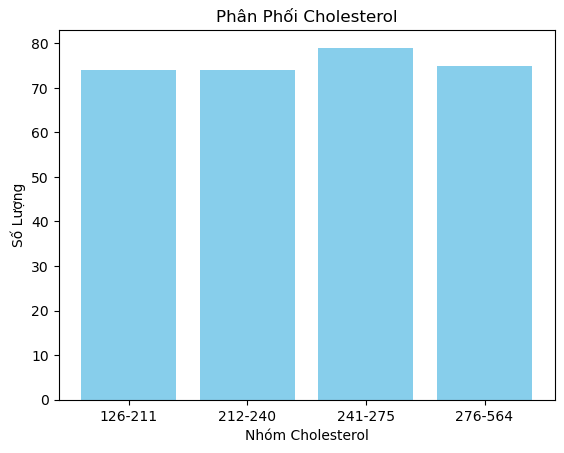

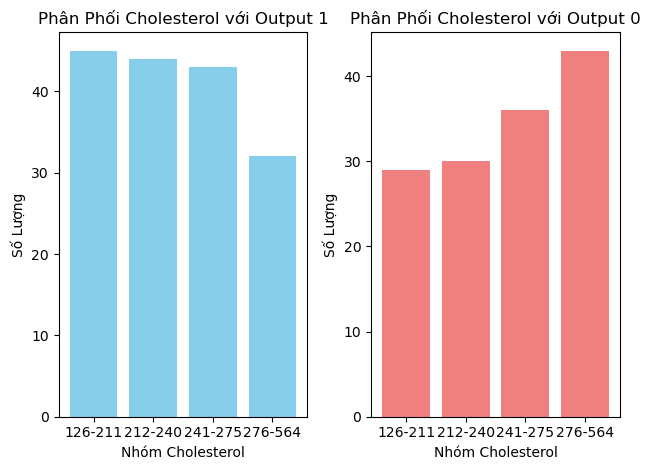

In [78]:
# Cholesterol
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn và 'chol' là cột chứa dữ liệu về cholesterol
# Nếu bạn đã có chol_count từ trước, bỏ qua bước này
chol_count = df['chol'].value_counts()

# Chia khoảng cholesterol và đếm số lượng
bins = [126, 211, 240, 275, 564]
labels = ['126-211', '212-240', '241-275', '276-564']
df['chol_group'] = pd.cut(df['chol'], bins=bins, labels=labels, right=False)
chol_group_count = df['chol_group'].value_counts().sort_index()

# Vẽ biểu đồ cột cho Cholesterol
plt.bar(chol_group_count.index, chol_group_count.values, color='skyblue')
plt.xlabel('Nhóm Cholesterol')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Cholesterol')
plt.show()
# ====================================================
# Tách dữ liệu thành hai nhóm: output là 1 và output là 0
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng Cholesterol cho mỗi nhóm và loại bỏ khoảng 0-126
chol_group_count_1 = df_output_1['chol_group'].value_counts().sort_index()
chol_group_count_0 = df_output_0['chol_group'].value_counts().sort_index()

# Vẽ biểu đồ cột cho Cholesterol với output là 1
plt.subplot(1, 2, 1)
plt.bar(chol_group_count_1.index, chol_group_count_1.values, color='skyblue')
plt.xlabel('Nhóm Cholesterol')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Cholesterol với Output 1')

# Vẽ biểu đồ cột cho Cholesterol với output là 0
plt.subplot(1, 2, 2)
plt.bar(chol_group_count_0.index, chol_group_count_0.values, color='lightcoral')
plt.xlabel('Nhóm Cholesterol')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Cholesterol với Output 0')

plt.tight_layout()
plt.show()